# Proyecto procesamiento de imagenes

In [3]:
import cv2
#!apt-get install -y libzbar0
#!pip install pyzbar opencv-python
from pyzbar.pyzbar import decode
import matplotlib.pyplot as plt

In [9]:
class Pipeline:
    def __init__(self, steps):
        self.steps = steps

    def run(self, data):
        for step in self.steps:
            data = step(data)
        return data

def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def threshold(threshold_value=128):
    def inner(image, threshold_value=threshold_value):
        _, thresholded_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
        return thresholded_image
    return inner

In [7]:
# Decode QR codes
def decode_qr(qr_image):
  decoded_objects = decode(qr_image)
  if not decoded_objects:
      return False, ""
  return True, decoded_objects[0].data.decode("utf-8")


def get_txt_content(file_name):
  print(file_name)
  with open(file_name, 'r') as file:
    content = file.read()
  return content

In [6]:
def checkQr(file_name):
  img_path = "png/" + file_name + ".png"
  img = cv2.imread(img_path)
  if img is None:
    print("Image png/" + file_name + ".png not found")
    return False

  print(file_name)
  content = ""
  # content = get_txt_content("txt/" + file_name + ".txt")

  ok, decoded = decode_qr(img)
  if ok:
    return decoded == content
  return False



In [ ]:
# Get file names in /png
import os
files = os.listdir("png")
files = [file.split(".")[0] for file in files]

for file in files:
  file_name = file.replace(".png", "")
  print(file_name, checkQr(file_name))



# pipeline = Pipeline([
#     threshold(128),
#     grayscale
# ])
# image = pipeline.run(image)


## Show image
# cv2_imshow(image)



png/.png
Image png/.png not found
 False
png/000004.png
000004
000004 False
png/000002.png
000002
000002 False
png/000000.png
000000
000000 False
png/000001.png
000001
000001 False
png/000003.png
000003
000003 False
png/000005.png
000005
000005 False


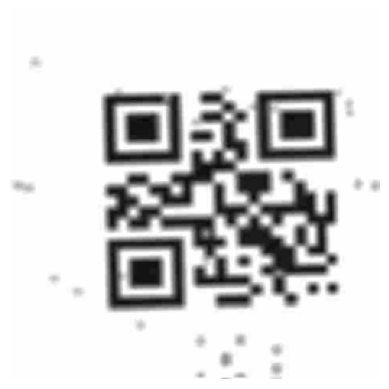

Decoded QR Code: ?


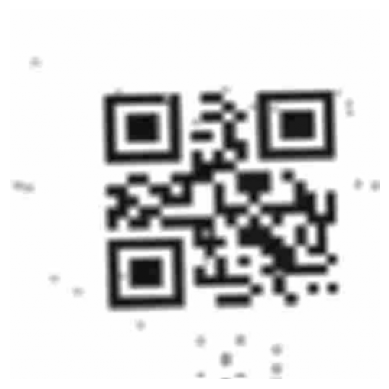

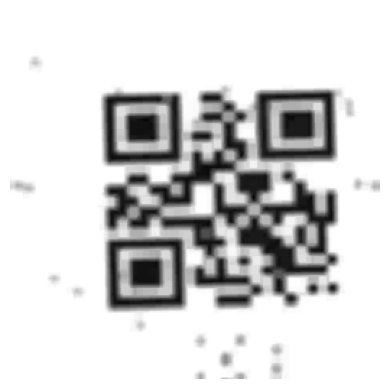

Decoded QR Code: ?


In [21]:
def opening(image):
    # Create a kernel for morphological operations
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    # Perform opening operation
    opened_image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    return opened_image

qr_image = cv2.imread("png/000004.png")
plt.imshow(qr_image)
plt.axis('off')
plt.show()
ok, decoded = decode_qr(qr_image)
if ok:
    print("Decoded QR Code:", decoded)
else:
    print("No QR Code found in the image.")
qr_image = grayscale(qr_image)
plt.imshow(qr_image, cmap='gray')
plt.axis('off')
plt.show()

qr_image = opening(qr_image)
plt.imshow(qr_image, cmap='gray')
plt.axis('off')
plt.show()
ok, decoded = decode_qr(qr_image)
if ok:
    print("Decoded QR Code:", decoded)
else:
    print("No QR Code found in the image.")